## **PROJECT TITLE : SPOTTTING FAKE JOBS** ##

![Fake_job](Images/Fake_Job.png)

# **BUSINESS UNDERSTANDING**

## **PROJECT OVERVIEW**

## **PROBLEM STATEMENT** 

## **OBJECTIVES**
1. To identify potential indicators of fradulent jobs.

2. To identify a job as fradulent or legitimate.

3. To generate actionable insights for job seekers and platforms to detect and prevent fradulent posting.


# **1. DATA LOADING AND EXPLORATION**

This is the first step where the data is loaded ,the data is explored to understand what can be achieved using the dataset.

In [3]:
# Importing necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Loading the dataset
fake_job_postings = pd.read_csv('Data/fake_job_postings.csv')
fake_job_postings.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [21]:
# checking the shape of the dataset
fake_job_postings.shape


(17880, 18)

In [22]:
# Checking the info of the dataset
fake_job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [23]:
# Summary statistics of the dataset
fake_job_postings.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# Checkig for missing values
fake_job_postings.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

There are missing values.

In [25]:
# Checking for duplicates
fake_job_postings.duplicated().sum()

0

There are no duplicates.

# **2. DATA CLEANING**

In this second step the data is cleaned this means handling missing values since ther are no duplicates , this is done in order to be able to proceed with analysis.

In [26]:
# Filling tex-based columns with "Not Provided"
text_cols = ["company_profile","description", "requirements", "benefits"]

fake_job_postings[text_cols] = fake_job_postings[text_cols].fillna("Not Provided")

In [27]:
# Filling categorical columns with "Unknown"
categorical_cols =[
    "location","department","employment_type","required_experience","required_education","industry","function"
]

fake_job_postings[categorical_cols] = fake_job_postings[categorical_cols].fillna("Unknown")

In [28]:
# Saving the cleaned dataset
fake_job_postings.to_csv('Data/cleaned_fake_job_postings.csv')

In [35]:
# Replace with your actual file path
cleaned_fake_job_postings = pd.read_csv("Data/cleaned_fake_job_postings.csv")

# Make a working copy
fake_job_postings = cleaned_fake_job_postings.copy()

df = fake_job_postings.copy()


# **3. EXPLORATORY DATA ANALYSIS (EDA)**

EDA is about asking questions of your data and visualizing answers, so you can build intuition before modeling.

## **🔹 1. Univariate Analysis (One Variable at a Time)**

📌 Goal: Look at the distribution and frequency of each feature.

Possible Checks:

Target Variable

Distribution of fraudulent jobs (class balance) → Bar Chart / Pie Chart.

Categorical Variables

employment_type, required_experience, required_education, industry, function, location → Bar Charts to see most common values.

Numerical Variables

telecommuting, has_company_logo, has_questions → Bar Charts (since they are binary).

Text Features

Job description/requirements length (histogram).

Word clouds of most frequent words in description or requirements.

In [33]:
# Set style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

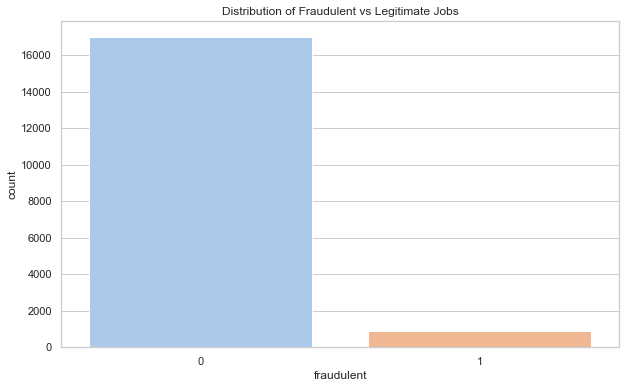

In [36]:
# Target variable distribution
sns.countplot(x="fraudulent", data=df)
plt.title("Distribution of Fraudulent vs Legitimate Jobs")
plt.show()

**🔹 2. Bivariate Analysis (Two Variables Together)**

📌 Goal: Explore relationships between features and the target (fraudulent).

Possible Checks:

Categorical vs Target

Fraud rate across employment_type (stacked bar).

Fraud rate across required_experience, industry, function.

Numerical vs Target

Average description/requirements length vs fraudulent (Boxplot).

Categorical vs Categorical

Cross-tab between employment_type and required_experience.

Binary Features vs Target

Fraud rate when has_company_logo = 0 vs 1.

Fraud rate when telecommuting = 0 vs 1.

**🔹 3. Multivariate Analysis (Three+ Variables)**

📌 Goal: Understand more complex interactions.

Possible Checks:

Correlation Heatmap

Check correlations among binary/numeric features (fraudulent, telecommuting, has_company_logo, has_questions).

Pairplot

Visualize relationships between fraudulent, description length, requirements length, and benefits length.

Grouped Analysis

Fraud rate by (industry + employment_type).

Fraud rate by (required_experience + required_education).

Text + Category

Compare most common words in fraudulent vs legitimate job postings.

Multivariate Plots

Parallel coordinates plot of numeric features across fraudulent vs non-fraudulent jobs.